# Parte 4 - Sección 21: KMeans

In [327]:
import pandas as pd

df_2vars = pd.read_csv('Mall_Customers.csv')
df_2vars.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Dos variables para entender de manera intuitiva

In [328]:
X_2vars = df_2vars.iloc[:, [3, 4]].values

In [329]:
from sklearn.preprocessing import StandardScaler

scaler_2vars = StandardScaler()
X_2vars = scaler_2vars.fit_transform(X_2vars)

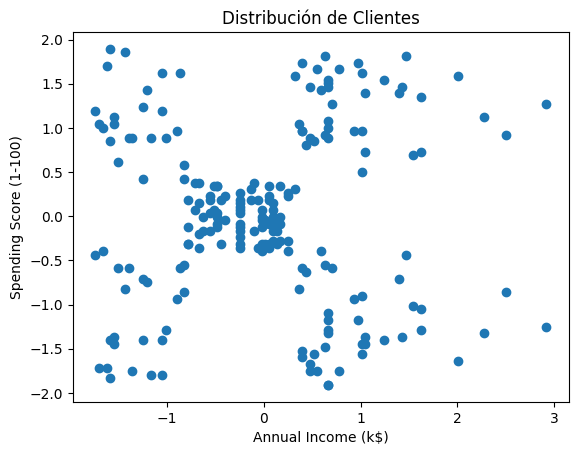

In [330]:
import matplotlib.pyplot as plt

plt.scatter(X_2vars[:, 0], X_2vars[:, 1])
plt.title('Distribución de Clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [331]:
from sklearn.cluster import KMeans

inertia_2vars = []
for i in range(1, 11):
    kmeans_temp = KMeans(n_clusters= i, init= 'k-means++', random_state= 0)
    kmeans_temp.fit(X_2vars)
    inertia_2vars.append(kmeans_temp.inertia_)

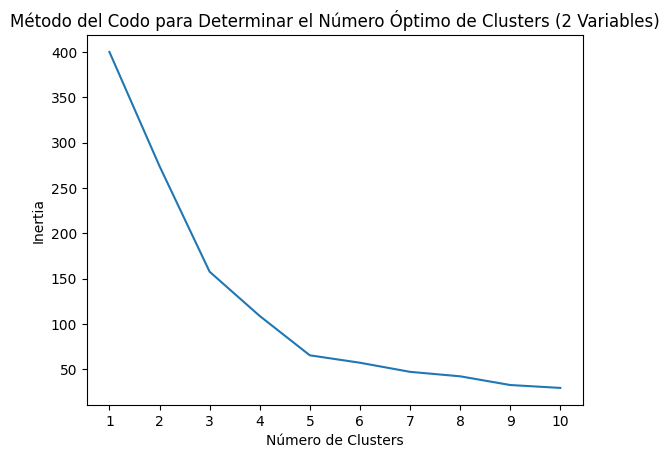

In [332]:
import matplotlib.pyplot as plt

plt.plot(range(1, 11), inertia_2vars)
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters (2 Variables)')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()  # Muestra el gráfico

In [333]:
kmeans_2vars = KMeans(n_clusters= 5, init= 'k-means++', random_state= 0)
y_kmeans_2vars = kmeans_2vars.fit_predict(X_2vars)

df_2vars['Cluster_2vars'] = y_kmeans_2vars
df_2vars

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_2vars
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


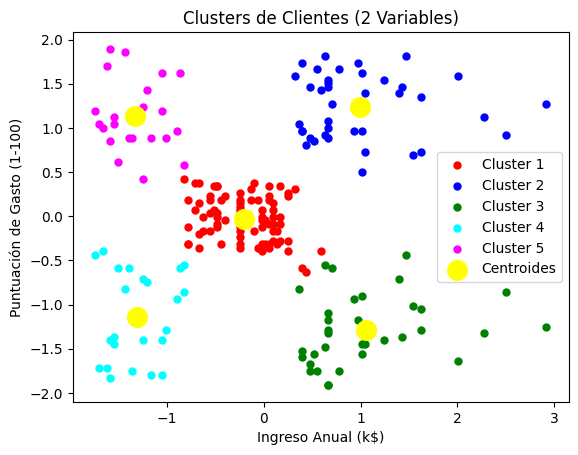

In [334]:
import matplotlib.pyplot as plt

# Visualización de los clusters
plt.scatter(X_2vars[y_kmeans_2vars == 0, 0], X_2vars[y_kmeans_2vars == 0, 1], s = 25, c = 'red', label = 'Cluster 1')  # Clientes del Cluster 1
plt.scatter(X_2vars[y_kmeans_2vars == 1, 0], X_2vars[y_kmeans_2vars == 1, 1], s = 25, c = 'blue', label = 'Cluster 2')  # Clientes del Cluster 2
plt.scatter(X_2vars[y_kmeans_2vars == 2, 0], X_2vars[y_kmeans_2vars == 2, 1], s = 25, c = 'green', label = 'Cluster 3')  # Clientes del Cluster 3
plt.scatter(X_2vars[y_kmeans_2vars == 3, 0], X_2vars[y_kmeans_2vars == 3, 1], s = 25, c = 'cyan', label = 'Cluster 4')  # Clientes del Cluster 4
plt.scatter(X_2vars[y_kmeans_2vars == 4, 0], X_2vars[y_kmeans_2vars == 4, 1], s = 25, c = 'magenta', label = 'Cluster 5')  # Clientes del Cluster 5

# Visualizamos los centros de los clusters
plt.scatter(kmeans_2vars.cluster_centers_[:, 0], kmeans_2vars.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroides')  # Los centroides de los clusters
plt.title('Clusters de Clientes (2 Variables)')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.legend()  # Añadimos la leyenda para identificar los clusters
plt.show()  # Muestra el gráfico

## Usando todas las variables

In [335]:
import pandas as pd

df_all = pd.read_csv('Mall_Customers.csv')
df_all.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [336]:
X_all = df_all.iloc[:, 1:].values

In [337]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

ct_all = ColumnTransformer(
    transformers= [
        ('cat', OneHotEncoder(), [0]),
        ('num', StandardScaler(), [1,2,3]),
    ], 
    remainder='passthrough') # Apply one hot encoding to the first column (index 0) and keep the rest of the columns as they are
X_all = np.array(ct_all.fit_transform(X_all)) # Transform the data and convert it to a numpy array

pd.DataFrame(X_all).head()

,0,1,2,3,4
0,0.0,1.0,-1.424569,-1.738999,-0.434801
1,0.0,1.0,-1.281035,-1.738999,1.195704
2,1.0,0.0,-1.352802,-1.700830,-1.715913
3,1.0,0.0,-1.137502,-1.700830,1.040418
4,1.0,0.0,-0.563369,-1.662660,-0.395980


In [338]:
from sklearn.cluster import KMeans

inertia_all = []
for i in range(1, 11):
    kmeans_temp_all = KMeans(n_clusters= i, init= 'k-means++', random_state= 0)
    kmeans_temp_all.fit(X_all)
    inertia_all.append(kmeans_temp_all.inertia_)

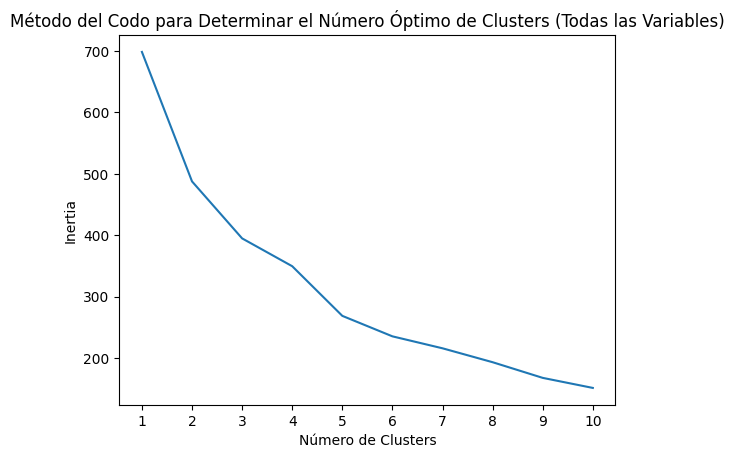

In [339]:
import matplotlib.pyplot as plt

plt.plot(range(1, 11), inertia_all)
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters (Todas las Variables)')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()  # Muestra el gráfico

In [340]:
kmeans_all = KMeans(n_clusters= 5, init= 'k-means++', random_state= 0)
y_kmeans_all = kmeans_all.fit_predict(X_all)

df_all['Cluster_all'] = y_kmeans_all
df_all

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_all
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,3
197,198,Male,32,126,74,4
198,199,Male,32,137,18,3
